<font size="6" color=red><b><center> Titanic Data Analysis</center></b></font> 

In [52]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#read the dataset
data=pd.read_csv("C:\\Users\\User\\Downloads\\titanic_dataset(2).csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#descriptive data analysis
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#datatypes of each column
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#checking for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#percentage of missing values in particular column
data.isna().sum() / data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
#Embarked is a categorical column so replaced it with mode
Embarked_mode = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(Embarked_mode) 

In [9]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [10]:
#Cabin column is a categorical varaiable and contains 77% of missing values 
#Cabin column contains series of data,so this column doesn't have much impact in my analysis
#Removed that column
data=data.drop('Cabin',axis=1)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

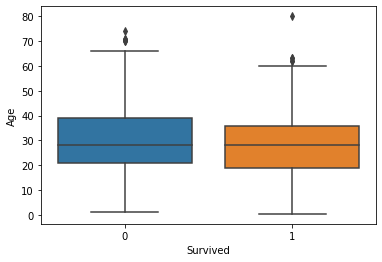

In [11]:
#find out the importance of Age feature in the dataset
sns.boxplot(x=data['Survived'], y=data["Age"], data=data)

In [12]:
#'Age' feature has importance in the analysis so replace it using the predicted value from randomforestRegressor
#Apply randomforestRegressor by setting features as "Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare"
#target as "Age"

In [13]:
data1 = data[["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]
data1["Sex"] = [1 if x=="male" else 0 for x in data1["Sex"]]
test_data = data1[data1["Age"].isnull()]
data1.dropna(inplace=True)
x_train = data1.drop("Age", axis=1)
x_test = test_data.drop("Age", axis=1)
y_train = data1["Age"]

C:\Users\User\AppData\Local\Temp\ipykernel_8544\1996613041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Sex"] = [1 if x=="male" else 0 for x in data1["Sex"]]
C:\Users\User\AppData\Local\Temp\ipykernel_8544\1996613041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace=True)


In [14]:
#apply RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [15]:
y_pred

array([24.74767929, 35.37746658, 15.19      , 35.0316426 , 21.68555556,
       27.8519094 , 35.91606667, 19.87195767, 21.17804496, 27.8519094 ,
       31.79222708, 33.86952706, 19.87195767, 24.57216667, 41.33742063,
       38.59355556, 14.56523492, 27.8519094 , 31.79222708, 21.67959524,
       31.79222708, 31.79222708, 27.8519094 , 26.03371287, 29.7411627 ,
       31.79222708, 44.10892732, 17.92722222, 27.3621746 , 30.49516973,
       25.94253604,  9.3204418 , 24.95777778, 58.22928134,  6.52903439,
       13.7862601 , 31.63444444, 58.22833333, 25.81      , 44.10892732,
       19.87195767,  9.3204418 , 35.11514764, 27.8519094 ,  7.03437103,
       29.53855458, 19.40695238, 25.81      , 30.49516973, 34.0012963 ,
       44.10892732, 32.10644459, 53.19255556, 19.87195767, 33.86972623,
       58.84376547, 38.59355556, 38.01769974, 19.87195767, 25.0078125 ,
       31.8485437 , 31.79222708, 29.26524074,  9.3204418 , 26.19975694,
       31.45185185, 27.8519094 , 26.72333333, 61.06088889, 35.03

In [16]:
#Replaced missing value with predicted value
data['Age'].loc[data['Age'].isna()] = y_pred

C:\Users\User\AppData\Local\Temp\ipykernel_8544\1101351323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].loc[data['Age'].isna()] = y_pred


In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.639038,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.777288,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#Apply feature engineering 
#by adding Parch and SibSp to create new column named co_travelers
data['Co_travelers'] = data.Parch + data.SibSp

In [20]:
#drop 'SibSp' and 'Parch' columns
data=data.drop(['SibSp','Parch'],axis=1)

In [21]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Co_travelers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.480476,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,0


In [23]:
#exploratory data analysis
cols=['Pclass','Co_travelers','Fare']

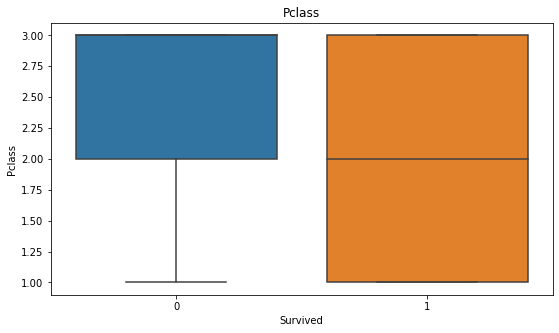

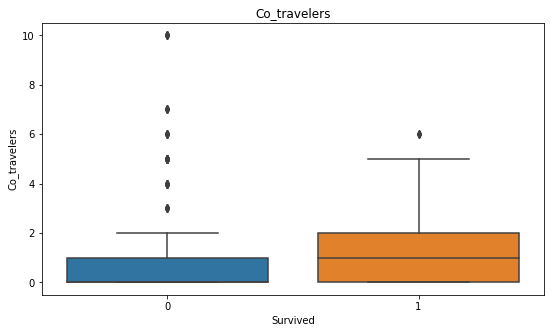

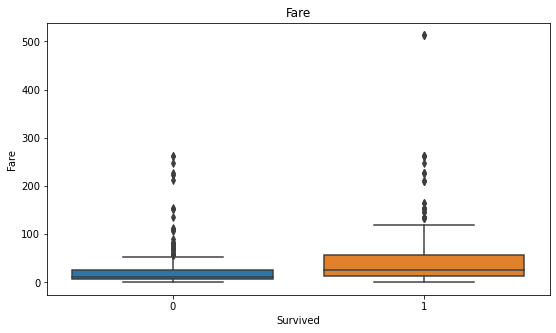

In [24]:
#create boxplot for analyize the data distribution among columns
for i in cols:
    plt.figure(figsize=(9,5))
    sns.boxplot(x=data['Survived'], y=data[i], data=pd.melt(data))
    plt.title(i)
    plt.show()

In [25]:
#Pclass 1 passengers were survived more than other pclasses.
#passengers accompanied with co_travelers had more survival rate. 
#Highest paid passengers saved firstly.

In [26]:
#Check how the "Sex" column related to target column
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
#Females got higher chance for survival compared to males.

In [28]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

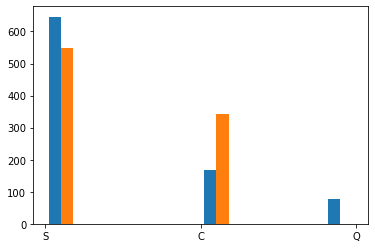

In [29]:
#Check how the 'Embarked' column related to target column using a histogram
plt.hist([data['Embarked'],data['Survived']]) 
plt.show()         

In [30]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [31]:
#passengers boarded from 'c' got higher chance of survival
#approximately 40% of passengers were saved amoung the passengers who started from 'Q' and 's'

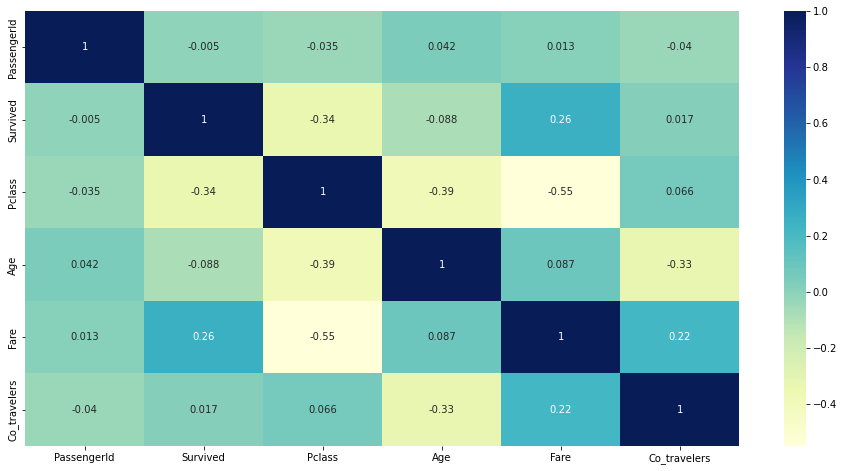

In [32]:
#Draw the heatmap for all the features
cor = data.corr()
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [33]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Co_travelers'],
      dtype='object')

In [34]:
#Remove the columns that doesn't have much importance in machine learning
data=data.drop(['PassengerId','Name','Ticket'],axis=1)

In [35]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Co_travelers'], dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

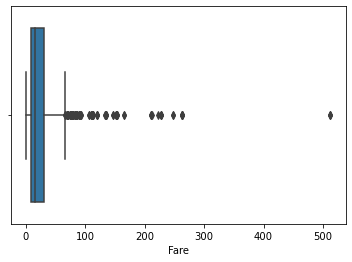

In [36]:
#checking the 'fare' column data distribution
sns.boxplot(data['Fare'])

In [37]:
data.describe()

,Survived,Pclass,Age,Fare,Co_travelers
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.639038,32.204208,0.904602
std,0.486592,0.836071,13.777288,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,37.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [38]:
#based on the fare value range ,replaced it with ordinal values
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

In [39]:
#Dealing categorical column 'Sex' using labelencoding
#set male as 0 and female as 1
label = LabelEncoder()
data['Sex']= label.fit_transform(data['Sex'])

In [40]:
#One-hot encoding to column 'Embarked'
data=pd.get_dummies(data)

In [41]:
data

,Survived,Pclass,Sex,Age,Fare,Co_travelers,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,0,1,0,0,1
1,1,1,0,38.000000,3,1,1,0,0
2,1,3,0,26.000000,1,0,0,0,1
3,1,1,0,35.000000,3,1,0,0,1
4,0,3,1,35.000000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,1,0,0,0,1
887,1,1,0,19.000000,2,0,0,0,1
888,0,3,0,23.480476,2,3,0,0,1
889,1,1,1,26.000000,2,0,1,0,0


In [45]:
#Apply standardScaling to all the numerical columns
sc=StandardScaler()
scaled_values = sc.fit_transform(data[['Age', 'Fare', 'Pclass', 'Co_travelers']])
scaled_df = pd.DataFrame(scaled_values, columns = ['Age', 'Fare', 'Pclass', 'Co_travelers'])

In [47]:
#Drop the actual 'Age', 'Fare', 'Pclass', 'co_travelers' columns from dataset
data=data.drop(['Age', 'Fare', 'Pclass', 'Co_travelers'],axis=1)

In [48]:
#replaced the dataset with scaled values
data=pd.concat([data,scaled_df],axis=1)
data

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Age,Fare,Pclass,Co_travelers
0,0,1,0,0,1,-0.554777,-1.346777,0.827377,0.059160
1,1,0,1,0,0,0.607206,1.337738,-1.566107,0.059160
2,1,0,0,0,1,-0.264281,-0.451938,0.827377,-0.560975
3,1,0,0,0,1,0.389334,1.337738,-1.566107,0.059160
4,0,1,0,0,1,0.389334,-0.451938,0.827377,-0.560975
...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,-0.191657,-0.451938,-0.369365,-0.560975
887,1,0,0,0,1,-0.772649,0.442900,-1.566107,-0.560975
888,0,0,0,0,1,-0.447259,0.442900,0.827377,1.299429
889,1,1,1,0,0,-0.264281,0.442900,-1.566107,-0.560975


In [49]:
#Split the dataset into feature set and target set
#set target as  Survived column
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [126]:
#Split entire dataset as training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# k-nearest neighbors (KNN)

In [127]:
#Find out the best k value by find out accuracy of each k
metric_k=[]
neighbors=range(2,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(x_train,y_train)
    y_KNN_predict=Classifier.predict(x_test)
    acc=accuracy_score(y_test,y_KNN_predict)
    metric_k.append(acc)

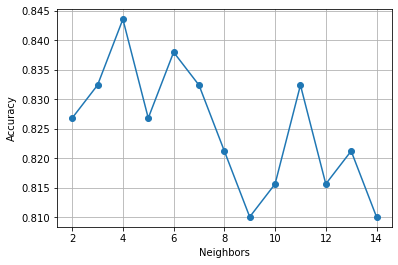

In [128]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [129]:
#set optimal value of k as 6

In [130]:
#apply the KNeighborsClassifier algorithm on training data
Classifier=KNeighborsClassifier(n_neighbors=4)
Classifier=Classifier.fit(x_train,y_train)
y_knn_pred=Classifier.predict(x_test)

In [136]:
#find out the mean accuracy score using k-fold cross validation
k_folds = KFold(n_splits = 5)
scores = cross_val_score(Classifier, x, y, cv = k_folds)
print("Average k-fold CV Score of KNN: ", scores.mean())

Average k-fold CV Score of KNN:  0.8226978846274559


In [137]:
#find out the mean accuracy score using stratified k-fold cross validation
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(Classifier, x, y, cv = sk_folds)
print("Average stratified k-fold CV Score of KNN: ", scores.mean())

Average stratified k-fold CV Score of KNN:  0.8283158621555458


# Support Vector Machine(SVM)

In [133]:
#implement SVM with linear kernal
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(x_train,y_train)
y_svm_predict=clf_svm.predict(x_test)

In [134]:
#find out the mean accuracy score using k-fold cross validation
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf_svm, x, y, cv = k_folds)
print("Average k-fold CV Score of SVM with linear kernal : ", scores.mean())

Average k-fold CV Score of SVM with linear kernal :  0.7867239972380893


In [135]:
#find out the mean accuracy score using stratified k-fold cross validation
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf_svm, x, y, cv = sk_folds)
print("Average stratified k-fold CV Score of SVM with linear kernal: ", scores.mean())

Average stratified k-fold CV Score of SVM with linear kernal:  0.7867365513778168


In [138]:
#implement SVM with rbf kernal
clf_svm1=SVC(kernel='rbf')
clf_svm1=clf_svm1.fit(x_train,y_train)
y_svm_predict_rbf=clf_svm1.predict(x_test)

In [139]:
#find out the mean accuracy score using k-fold cross validation
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf_svm1, x, y, cv = k_folds)
print("Average k-fold CV Score of SVM with linear kernal : ", scores.mean())

Average k-fold CV Score of SVM with linear kernal :  0.8237838177138912


In [140]:
#find out the mean accuracy score using stratified k-fold cross validation
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf_svm1, x, y, cv = sk_folds)
print("Average stratified k-fold CV Score of SVM with rbf kernal: ", scores.mean())

Average stratified k-fold CV Score of SVM with rbf kernal:  0.8271420500910175
